In [37]:
"""Single internal hidden layer NN
src code : https://github.com/Audhil/tensorflow_cookbook/blob/master/06_Neural_Networks/04_Single_Hidden_Layer_Network/04_single_hidden_layer_network.ipynb"""

# using iris dataset
# We will build a one-hidden layer neural network to predict the fourth attribute, 
# Petal Width from the other three (Sepal length, Sepal width, Petal length).

import tensorflow as tf
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

Generation: 50. Loss = 0.107694
Generation: 100. Loss = 0.0723942
Generation: 150. Loss = 0.141572
Generation: 200. Loss = 0.0404232
Generation: 250. Loss = 0.0715942


Generation: 300. Loss = 0.030694
Generation: 350. Loss = 0.0331174
Generation: 400. Loss = 0.0317346
Generation: 450. Loss = 0.0517166
Generation: 500. Loss = 0.0508378


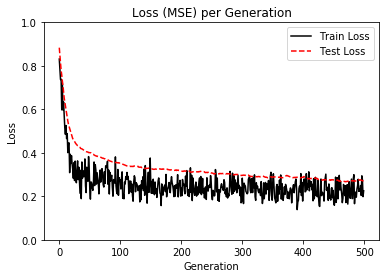

In [38]:
iris_dataset = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris_dataset.data])
y_vals = np.array([x[3] for x in iris_dataset.data])

# seed for making the result reproducible
seed = 33
np.random.seed(seed)
tf.set_random_seed(seed)

# split the data to train/test to 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * .8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_train_data = x_vals[train_indices]
x_test_data = x_vals[test_indices]
y_train_data = y_vals[train_indices]
y_test_data = y_vals[test_indices]


# Normalize col by max-min norm
def norm_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)


x_vals_train = np.nan_to_num(norm_cols(x_train_data))
x_vals_test = np.nan_to_num(norm_cols(x_test_data))

# tuning knobs
batch_size = 25
learning_rate = .005
epochs = 500
display_step = 50

# place holders
x_data = tf.placeholder(tf.float32, shape=[None, 3])
y_target = tf.placeholder(tf.float32, shape=[None, 1])

# vars
no_of_hidden_layers = 10
A1 = tf.Variable(tf.random_normal(shape=[3, no_of_hidden_layers]))  # inputs to hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[no_of_hidden_layers]))  # one biases for each nodes

A2 = tf.Variable(tf.random_normal(shape=[no_of_hidden_layers, 1]))  # hidden input -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[1]))  # 1 bias for output

# model operation - with activation functions
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

# loss - MSE
loss = tf.reduce_mean(tf.square(tf.subtract(final_output, y_target)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# train
train_step = optimizer.minimize(loss)

# init vars
init_vars = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_vars)

    loss_vec = []
    test_loss = []
    for i in range(epochs):
        random_choice = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[random_choice]
        rand_y = np.transpose([y_train_data[random_choice]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(np.sqrt(temp_loss))
        test_loss.append(np.sqrt(sess.run(loss,
                                          feed_dict={x_data: x_vals_test, y_target: np.transpose([y_test_data])})))

        if (i + 1) % display_step == 0:
            print('Generation: ' + str(i + 1) + '. Loss = ' + str(temp_loss))

    plt.plot(loss_vec, 'k-', label='Train Loss')
    plt.plot(test_loss, 'r--', label='Test Loss')
    plt.title('Loss (MSE) per Generation')
    plt.legend(loc='upper right')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.ylim(0., 1.)
    plt.show()
